<a href="https://colab.research.google.com/github/Akshat13shah/STT_Ai_Assignment6/blob/main/Hyperparameters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow

In [2]:
pip install --upgrade tensorflow

In [3]:
!pip install --upgrade keras tensorflow

In [4]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, InputLayer

In [41]:
# Load the Iris dataset
data = load_iris()
X, y = data.data, data.target.reshape(-1, 1)

In [42]:
# One-hot encode labels
encoder = OneHotEncoder(sparse_output=False)
y_onehot = encoder.fit_transform(y)

In [44]:
# Split the dataset into training, and test sets (80%, 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

In [45]:
# Function to build the model
def build_model(input_shape=(4,)):
    model = Sequential([
        InputLayer(shape=input_shape),
        Dense(16, activation='relu'),
        Dense(3, activation='softmax')
    ])
    return model

In [46]:
# Function to compile the model
def compile_model(model, learning_rate):
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
                  loss=keras.losses.BinaryCrossentropy())

In [47]:
# Function to train the model
def train_model(model, X_train, y_train, epochs, batch_size):
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                        verbose=1, validation_split=0.1)
    return history

In [48]:
# Function to evaluate the model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_test_classes = np.argmax(y_test, axis=1)

    accuracy = accuracy_score(y_test_classes, y_pred_classes)
    f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')

    return accuracy, f1, y_pred_classes, y_test_classes

In [49]:
# Function to display sample predictions in a simple, clean format
def display_sample_predictions(X_test, y_test_classes, y_pred_classes):
    print("\nSample Predictions:")
    print("-" * 50)
    print(f"{'Features':<30} {'True Label':<15} {'Predicted Label'}")
    print("-" * 50)

    # Loop through the first 5 predictions or as many as available
    for i in range(min(5, len(X_test))):
        # Format the output neatly
        feature_str = str(X_test[i])
        true_label = y_test_classes[i]
        predicted_label = y_pred_classes[i]

        # Print the row in a formatted way
        print(f"{feature_str:<30} {true_label:<15} {predicted_label}")

    print("-" * 50)


In [50]:
# Function to perform grid search
def grid_search(batch_sizes, learning_rates, epochs, X_train, y_train, X_test, y_test):
    config_list_grid = []
    results = []


    for batch_size in batch_sizes:
        for learning_rate in learning_rates:
            for epoch in epochs:
                print(f"\nTraining model with batch_size={batch_size}, learning_rate={learning_rate}, epochs={epoch}")
                keras.backend.clear_session()  # Reset the Keras backend session

                # Build and compile the model
                model = build_model(input_shape=(4,))
                compile_model(model, learning_rate)

                # Train the model
                history = train_model(model, X_train, y_train, epoch, batch_size)

                # Evaluate the model
                accuracy, f1, y_pred_classes, y_test_classes = evaluate_model(model, X_test, y_test)

                # Record the configuration and results
                config_list_grid.append((batch_size, learning_rate, epoch))
                results.append({
                    'batch_size': batch_size,
                    'learning_rate': learning_rate,
                    'epochs': epoch,
                    'accuracy': accuracy,
                    'f1': f1,
                    'train_loss': history.history['loss'],
                    'val_loss': history.history['val_loss'],
                    'y_pred_classes': y_pred_classes,
                    'y_test_classes': y_test_classes
                })

                # Display sample predictions
                display_sample_predictions(X_test, y_test_classes, y_pred_classes)

                # Output evaluation metrics
                print(f"\nEvaluation for batch_size={batch_size}, learning_rate={learning_rate}, epochs={epoch}")
                print(f"Accuracy: {accuracy:.4f}")
                print(f"F1 Score: {f1:.4f}")

    return results

In [51]:
# Define hyperparameter values
batch_sizes = [2, 4]
learning_rates = [1e-3, 1e-5]
epochs = [1, 3, 5]

In [52]:
# Perform grid search
results = grid_search(batch_sizes, learning_rates, epochs, X_train, y_train, X_test, y_test)


Training model with batch_size=2, learning_rate=0.001, epochs=1
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.9898 - val_loss: 0.6757
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step

Sample Predictions:
--------------------------------------------------
Features                       True Label      Predicted Label
--------------------------------------------------
[6.1 2.8 4.7 1.2]              1               1
[5.7 3.8 1.7 0.3]              0               1
[7.7 2.6 6.9 2.3]              2               2
[6.  2.9 4.5 1.5]              1               1
[6.8 2.8 4.8 1.4]              1               1
--------------------------------------------------

Evaluation for batch_size=2, learning_rate=0.001, epochs=1
Accuracy: 0.3333
F1 Score: 0.2032

Training model with batch_size=2, learning_rate=0.001, epochs=3
Epoch 1/3
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.7966 - val_loss: 0.6612
Epoch 2/3
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6306 - val_loss: 0.5822
Epoch 3/3
54/54 ━

In [53]:
pd.DataFrame(results)

,batch_size,learning_rate,epochs,accuracy,f1,train_loss,val_loss,y_pred_classes,y_test_classes
0,2,0.00100,1,0.333333,0.203216,[0.8845914006233215],[0.675654411315918],"[1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, ..."
1,2,0.00100,3,0.700000,0.593548,"[0.7262977957725525, 0.6066655516624451, 0.553...","[0.6612451672554016, 0.5821690559387207, 0.549...","[2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, ...","[1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, ..."
2,2,0.00100,5,0.700000,0.688491,"[0.7324578166007996, 0.6158706545829773, 0.582...","[0.5988664031028748, 0.5782747268676758, 0.558...","[1, 0, 1, 1, 1, 0, 2, 2, 1, 1, 2, 0, 0, 0, 0, ...","[1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, ..."
3,2,0.00001,1,0.333333,0.166667,[1.096242070198059],[1.272308111190796],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, ..."
4,2,0.00001,3,0.366667,0.206838,"[0.9006807804107666, 0.8977279663085938, 0.894...","[0.9432842135429382, 0.9397329688072205, 0.936...","[2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, ...","[1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, ..."
5,2,0.00001,5,0.333333,0.166667,"[1.1987273693084717, 1.1925201416015625, 1.186...","[1.2794346809387207, 1.2730735540390015, 1.266...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, ..."
6,4,0.00100,1,0.700000,0.593548,[0.6256506443023682],[0.6545153856277466],"[2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, ...","[1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, ..."
7,4,0.00100,3,0.700000,0.593548,"[0.7141246795654297, 0.6239433288574219, 0.570...","[0.6449614763259888, 0.5871577262878418, 0.553...","[2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, ...","[1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, ..."
8,4,0.00100,5,0.733333,0.662222,"[0.6707627177238464, 0.5983628034591675, 0.556...","[0.5861595273017883, 0.5463759303092957, 0.522...","[2, 0, 2, 2, 2, 0, 1, 2, 2, 2, 2, 0, 0, 0, 0, ...","[1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, ..."
9,4,0.00001,1,0.333333,0.166667,[1.3614050149917603],[1.5363446474075317],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, ..."


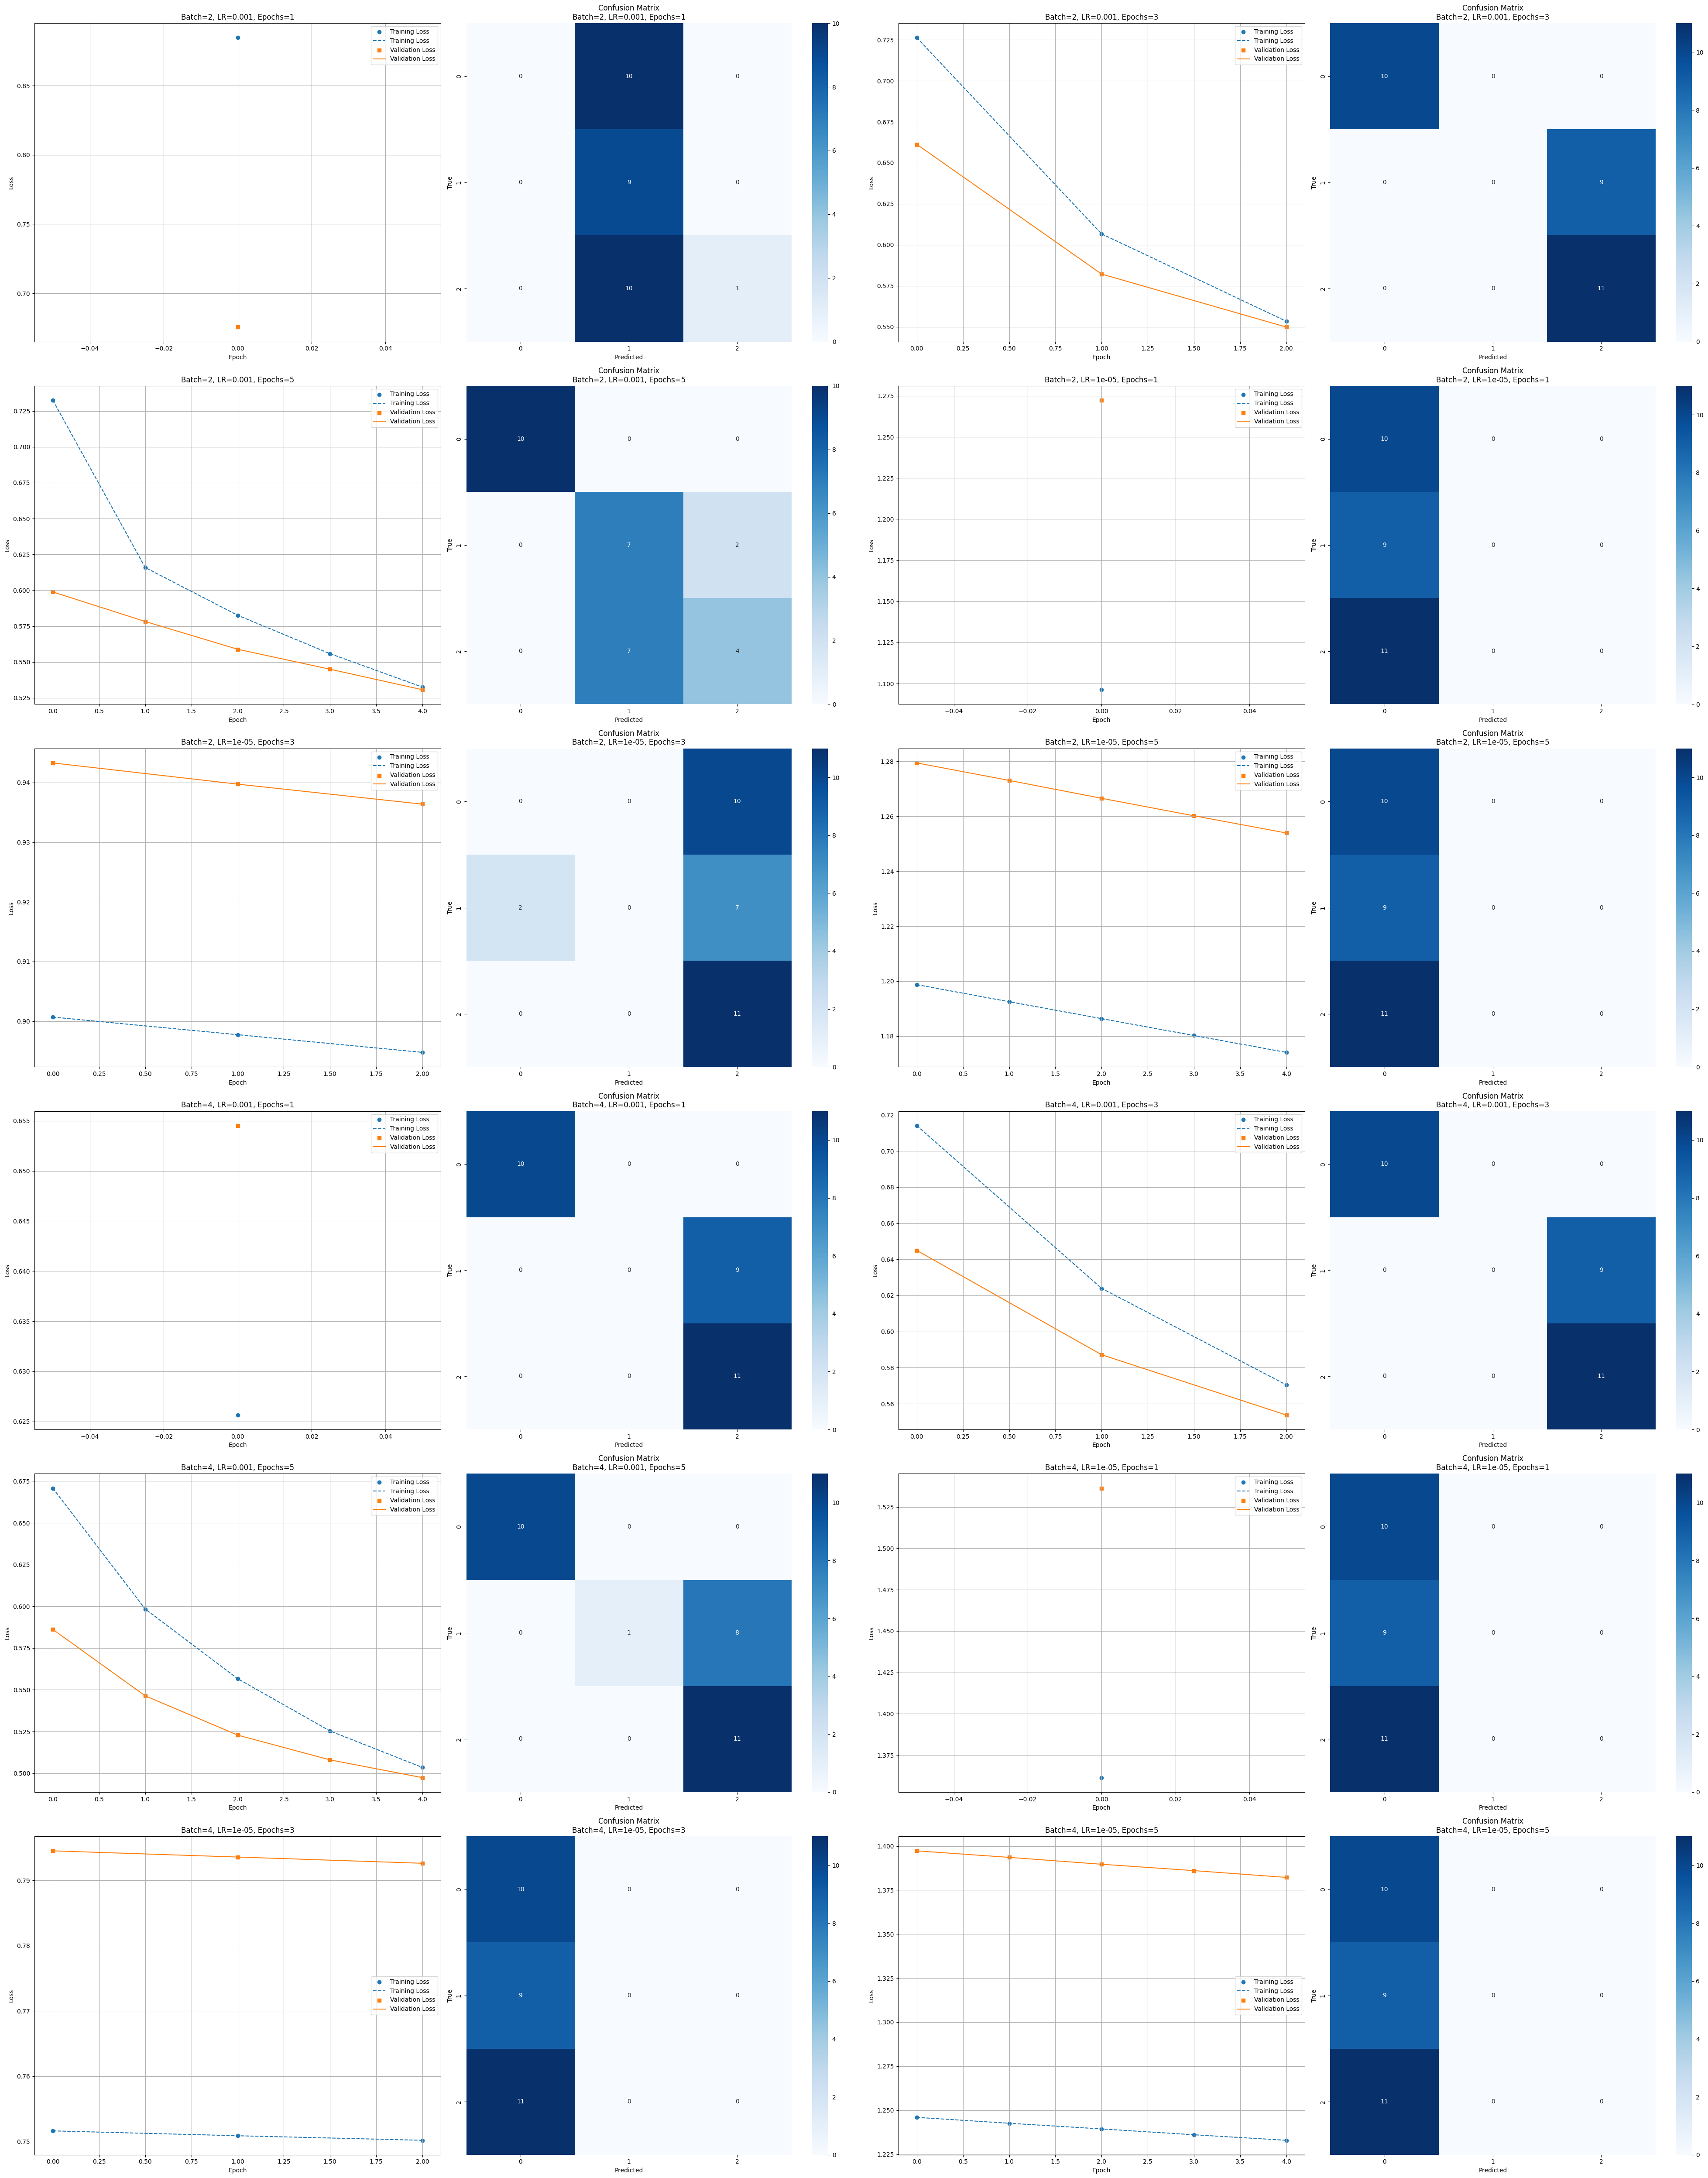

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Number of plots = 24
num_plots = 24

# Create a 6-row, 4-column grid for the plots (training/validation loss and confusion matrices)
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(40, 50))  # 6 rows, 4 columns
axes = axes.flatten()

# Loop to plot both training/validation loss and confusion matrix
for i in range(num_plots // 2):  # Dividing by 2 because we plot 2 items per result (loss plot and confusion matrix)
    result = results[i]

    # Left column for training/validation loss (first 12 axes)
    ax_loss = axes[2 * i]  # Select corresponding axis for loss plot

    # Plot Training and Validation Loss
    ax_loss.scatter(range(len(result['train_loss'])), result['train_loss'], label='Training Loss', marker='o')
    ax_loss.plot(result['train_loss'], label='Training Loss', linestyle='dashed')
    ax_loss.scatter(range(len(result['val_loss'])), result['val_loss'], label='Validation Loss', marker='s')
    ax_loss.plot(result['val_loss'], label='Validation Loss', linestyle='solid')
    ax_loss.set_xlabel('Epoch')
    ax_loss.set_ylabel('Loss')
    ax_loss.set_title(f'Batch={result["batch_size"]}, LR={result["learning_rate"]}, Epochs={result["epochs"]}')
    ax_loss.legend()
    ax_loss.grid(True)

    # Right column for confusion matrix (next 12 axes)
    ax_cm = axes[2 * i + 1]  # Select corresponding axis for confusion matrix

    # Plot Confusion Matrix
    cm = confusion_matrix(result['y_test_classes'], result['y_pred_classes'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax_cm)
    ax_cm.set_title(f'Confusion Matrix\nBatch={result["batch_size"]}, LR={result["learning_rate"]}, Epochs={result["epochs"]}')
    ax_cm.set_xlabel('Predicted')
    ax_cm.set_ylabel('True')

# Remove any unused subplots if the number of results is less than 24
for j in range(num_plots, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [18]:
!pip install autogluon

In [78]:
import autogluon.common as agcm
from autogluon.tabular import TabularPredictor, TabularDataset

In [79]:
# importing the iris dataset with pd as required by AutoGluon
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['target'] = iris.target

# Split with stratification (70% train, 20% test, 10% holdout for bagging)

train, test = train_test_split(data, test_size=0.2, stratify=data['target'], random_state=42)

# Convert to AutoGluon datasets
train_data = TabularDataset(train)
test_data = TabularDataset(test)

In [80]:
# Define and initialize all configurations in one go
predictor = TabularPredictor(
    label='target',
    eval_metric='accuracy',
    path='.',
    verbosity=2,
    problem_type='multiclass'
).fit(
    train_data,
    hyperparameters={'NN_TORCH': {
        'num_epochs': agcm.space.Categorical(1, 3, 5),
        'learning_rate': agcm.space.Categorical(1e-3, 1e-5),
        'batch_size': agcm.space.Categorical(2, 4),
        'activation': 'relu',
        'hidden_size': 16,
        'num_layers': 1
    }},
    time_limit=600,
    verbosity=2,
    presets='medium_quality_faster_train',
    raise_on_no_models_fitted=True,
    hyperparameter_tune_kwargs={
        'num_trials': 10,
        'scheduler': 'local',
        'searcher': 'random'
    }
)


Preset alias specified: 'medium_quality_faster_train' maps to 'medium_quality'.
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       9.59 GB / 12.67 GB (75.7%)
Disk Space Avail:   71.13 GB / 107.72 GB (66.0%)
Presets specified: ['medium_quality_faster_train']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "/content"
Train Data Rows:    120
Train Data Columns: 4
Label Column:       target
Problem Type:       multiclass
Preprocessing data ...
Train Data Class Count: 3
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    9821.04 MB
	Train Data (Original)  Memory Usage: 0.00 MB (0.0% of available memory)
	Inferring data type of each 

+--------------------------------------------------------+
| Configuration for experiment     NeuralNetTorch        |
+--------------------------------------------------------+
| Search algorithm                 BasicVariantGenerator |
| Scheduler                        FIFOScheduler         |
| Number of trials                 10                    |
+--------------------------------------------------------+

View detailed results here: /content/models/NeuralNetTorch


Fitted model: NeuralNetTorch/18ddf_00000 ...
	0.5417	 = Validation score   (accuracy)
	8.82s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: NeuralNetTorch/18ddf_00001 ...
	0.0417	 = Validation score   (accuracy)
	8.84s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: NeuralNetTorch/18ddf_00002 ...
	0.2917	 = Validation score   (accuracy)
	6.8s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: NeuralNetTorch/18ddf_00003 ...
	0.625	 = Validation score   (accuracy)
	6.74s	 = Training   runtime
	0.02s	 = Validation runtime
Fitted model: NeuralNetTorch/18ddf_00004 ...
	0.625	 = Validation score   (accuracy)
	6.34s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: NeuralNetTorch/18ddf_00005 ...
	0.7083	 = Validation score   (accuracy)
	6.3s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: NeuralNetTorch/18ddf_00006 ...
	0.625	 = Validation score   (accuracy)
	7.95s	 = Training   runtime
	0.01s	 = Validation runtime

Fitting model: WeightedEnsemble_L2 ... Training model for up to 360.00s of the 506.15s of remaining time.
	Ensemble Weights: {'NeuralNetTorch/18ddf_00005': 1.0}
	0.7083	 = Validation score   (accuracy)
	0.01s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 93.9s ... Best model: WeightedEnsemble_L2 | Estimated inference throughput: 3988.2 rows/s (24 batch size)
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("/content")


In [119]:
# # Define the model save path and results file
# results_path = 'models/random_model_results'
# if not os.path.exists(results_path):
#     os.makedirs(results_path)

# results_file = os.path.join(results_path, 'hyperparameter_results.pkl')

# Fit the model
predictor = TabularPredictor(
    label='target',
    eval_metric='accuracy',
    path='models/random_model',
    verbosity=2,
    problem_type='multiclass'
).fit(
    train_data,
    hyperparameters={'NN_TORCH': {
    'num_epochs': agcm.space.Categorical(1, 3, 5),
    'learning_rate': agcm.space.Categorical(1e-3, 1e-5),
    'batch_size': agcm.space.Categorical(2, 4),
    'activation': 'relu',
    'optimizer': 'adam',
    'hidden_size': 16,
    'num_layers': 1
}},
    time_limit=600,
    verbosity=2,
    presets='medium_quality_faster_train',
    raise_on_no_models_fitted=True,
    hyperparameter_tune_kwargs={
    'num_trials': 10,
    'scheduler': 'local',
    'searcher': 'random',
}
)

Preset alias specified: 'medium_quality_faster_train' maps to 'medium_quality'.
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       9.71 GB / 12.67 GB (76.6%)
Disk Space Avail:   71.12 GB / 107.72 GB (66.0%)
Presets specified: ['medium_quality_faster_train']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "/content/models/random_model"
Train Data Rows:    120
Train Data Columns: 4
Label Column:       target
Problem Type:       multiclass
Preprocessing data ...
Train Data Class Count: 3
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    9938.52 MB
	Train Data (Original)  Memory Usage: 0.00 MB (0.0% of available memory)
	Inferrin

+--------------------------------------------------------+
| Configuration for experiment     NeuralNetTorch        |
+--------------------------------------------------------+
| Search algorithm                 BasicVariantGenerator |
| Scheduler                        FIFOScheduler         |
| Number of trials                 10                    |
+--------------------------------------------------------+

View detailed results here: /content/models/random_model/models/NeuralNetTorch


Fitted model: NeuralNetTorch/badfb_00000 ...
	0.5417	 = Validation score   (accuracy)
	8.66s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: NeuralNetTorch/badfb_00001 ...
	0.5	 = Validation score   (accuracy)
	8.63s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: NeuralNetTorch/badfb_00002 ...
	0.0417	 = Validation score   (accuracy)
	12.25s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: NeuralNetTorch/badfb_00003 ...
	0.0	 = Validation score   (accuracy)
	11.7s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: NeuralNetTorch/badfb_00004 ...
	0.5	 = Validation score   (accuracy)
	6.09s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: NeuralNetTorch/badfb_00005 ...
	0.5	 = Validation score   (accuracy)
	6.07s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: NeuralNetTorch/badfb_00006 ...
	0.4583	 = Validation score   (accuracy)
	6.13s	 = Training   runtime
	0.01s	 = Validation runtime
Fit

Fitting model: WeightedEnsemble_L2 ... Training model for up to 360.00s of the 488.34s of remaining time.
	Ensemble Weights: {'NeuralNetTorch/badfb_00000': 1.0}
	0.5417	 = Validation score   (accuracy)
	0.01s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 111.73s ... Best model: WeightedEnsemble_L2 | Estimated inference throughput: 3132.3 rows/s (24 batch size)
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("/content/models/random_model")


In [107]:
import os
import pickle

# Initialize an empty dictionary to store model details
random_models = {}

# Path to the models directory
model_base_path = '/content/models/random_model/models/NeuralNetTorch/'

# Iterate through the possible subdirectories
for i in range(10):
    # Define the path for the current model subdirectory
    subdir_path = os.path.join(model_base_path, f'df711_0000{i}')

    # Check if the subdirectory exists
    if os.path.exists(subdir_path):
        # Loop through the files in the subdirectory
        for model_file in os.listdir(subdir_path):
            model_file_path = os.path.join(subdir_path, model_file)

            # Load and process the pickle model file
            with open(model_file_path, 'rb') as file:
                model_pkl = pickle.load(file)

                # Extract model hyperparameters and store them in the dictionary
                model_key = f'df711_0000{i}_{model_file}'
                batch_size = model_pkl.params.get('batch_size', None)
                learning_rate = model_pkl.params.get('learning_rate', None)
                num_epochs = model_pkl.params.get('num_epochs', None)

                # Store the information in the dictionary
                random_models[model_key] = {
                    'batch_size': batch_size,
                    'learning_rate': learning_rate,
                    'num_epochs': num_epochs
                }

# Convert the dictionary to a pandas DataFrame for tabular representation
df = pd.DataFrame.from_dict(random_models, orient='index')

# Display the table
print(df)

# Optionally, save the table to a CSV file
df.to_csv('/content/random_models_results.csv')

# Notify user about the saved file
print('')
print("The results have been saved to /content/random_models_results.csv")


                       batch_size  learning_rate  num_epochs
df711_00000_model.pkl           2        0.00100           1
df711_00001_model.pkl           2        0.00001           5
df711_00002_model.pkl           4        0.00100           5
df711_00003_model.pkl           2        0.00100           1
df711_00004_model.pkl           4        0.00100           5
df711_00005_model.pkl           4        0.00100           3
df711_00006_model.pkl           2        0.00100           3
df711_00007_model.pkl           4        0.00100           5
df711_00008_model.pkl           4        0.00001           1
df711_00009_model.pkl           4        0.00001           1

The results have been saved to /content/random_models_results.csv


In [108]:
# Evaluate performance
y_test = test_data['target']
y_pred = predictor.predict(test_data.drop(columns=['target']))
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Test F1: {f1_score(y_test, y_pred, average='weighted'):.4f}")

# Get leaderboard and create clean configuration table
leaderboard = predictor.leaderboard(test_data)

Test Accuracy: 0.8333
Test F1: 0.8222


In [110]:
random_models

{'df711_00000_model.pkl': {'batch_size': 2,
  'learning_rate': 0.001,
  'num_epochs': 1},
 'df711_00001_model.pkl': {'batch_size': 2,
  'learning_rate': 1e-05,
  'num_epochs': 5},
 'df711_00002_model.pkl': {'batch_size': 4,
  'learning_rate': 0.001,
  'num_epochs': 5},
 'df711_00003_model.pkl': {'batch_size': 2,
  'learning_rate': 0.001,
  'num_epochs': 1},
 'df711_00004_model.pkl': {'batch_size': 4,
  'learning_rate': 0.001,
  'num_epochs': 5},
 'df711_00005_model.pkl': {'batch_size': 4,
  'learning_rate': 0.001,
  'num_epochs': 3},
 'df711_00006_model.pkl': {'batch_size': 2,
  'learning_rate': 0.001,
  'num_epochs': 3},
 'df711_00007_model.pkl': {'batch_size': 4,
  'learning_rate': 0.001,
  'num_epochs': 5},
 'df711_00008_model.pkl': {'batch_size': 4,
  'learning_rate': 1e-05,
  'num_epochs': 1},
 'df711_00009_model.pkl': {'batch_size': 4,
  'learning_rate': 1e-05,
  'num_epochs': 1}}

In [144]:
# Initialize an empty list to store model configurations and performance metrics
model_info_list = []

# Iterate through the leaderboard rows
for _, row in leaderboard.iterrows():
    # Filter models that are of type NeuralNetTorch
    if 'NeuralNetTorch' in row['model']:
        # Get predictions from the current model using test data (excluding the target column)
        test_features = test_data.drop(columns=['target'])
        predictions = predictor.predict(test_features, model=row['model'])

        # Calculate the weighted F1 score using the actual labels (y_test) and predictions
        weighted_f1_score = f1_score(y_test, predictions, average='weighted')

        # Extract model ID from the model name (splitting based on '/')
        model_id = row['model'].split('/')[1]

        # Extract the base model ID (e.g., df711_00001) from the model file name
        model_id_base = model_id.split('_')[0] + '_' + model_id.split('_')[1]

        # Construct the model file name based on the base model ID
        model_file_name = f"{model_id_base}_model.pkl"  # Construct the filename to match random_models

        # Check if the model file name exists in the random_models dictionary
        if model_file_name in random_models:
            # Extract hyperparameters from the random_models dictionary
            learning_rate_value = random_models[model_file_name]['learning_rate']
            epochs_value = random_models[model_file_name]['num_epochs']
            batch_size_value = random_models[model_file_name]['batch_size']

            # Collect the information for this model
            model_info_list.append({
                'Model Name': row['model'],
                'Test Accuracy': row['score_test'],
                'Weighted F1 Score': weighted_f1_score,
                'Learning Rate': learning_rate_value,
                'Epochs': epochs_value,
                'Batch Size': batch_size_value
            })
        else:
            # If the model file name is not found in random_models, print a warning and skip
            pass

# Convert the collected information into a pandas DataFrame
model_performance_df = pd.DataFrame(model_info_list)


In [120]:
# Fit the model
predictor = TabularPredictor(
    label='target',
    eval_metric='accuracy',
    path='models/bayesian_model',
    verbosity=2,
).fit(
    train_data,
    hyperparameters={'NN_TORCH': {
    'num_epochs': agcm.space.Categorical(1, 3, 5),
    'learning_rate': agcm.space.Categorical(1e-3, 1e-5),
    'batch_size': agcm.space.Categorical(2, 4),
    'activation': 'relu',
    'optimizer': 'adam',
    'hidden_size': 16,
    'num_layers': 1
}},
    time_limit=300,
    verbosity=2,
    presets='medium_quality_faster_train',
    raise_on_no_models_fitted=True,
    hyperparameter_tune_kwargs={
    'num_trials': 10,
    'scheduler': 'local',
    'searcher': 'random',
}
)

Preset alias specified: 'medium_quality_faster_train' maps to 'medium_quality'.
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       9.60 GB / 12.67 GB (75.7%)
Disk Space Avail:   71.12 GB / 107.72 GB (66.0%)
Presets specified: ['medium_quality_faster_train']
Beginning AutoGluon training ... Time limit = 300s
AutoGluon will save models to "/content/models/bayesian_model"
Train Data Rows:    120
Train Data Columns: 4
Label Column:       target
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == int, but few unique label-values observed).
	3 unique label values:  [0, 2, 1]
	If 'multiclass' is not the correct problem_type, please manually specify the problem_type parameter during Predictor init (You may 

+--------------------------------------------------------+
| Configuration for experiment     NeuralNetTorch        |
+--------------------------------------------------------+
| Search algorithm                 BasicVariantGenerator |
| Scheduler                        FIFOScheduler         |
| Number of trials                 10                    |
+--------------------------------------------------------+

View detailed results here: /content/models/bayesian_model/models/NeuralNetTorch


Fitted model: NeuralNetTorch/3e9fc_00000 ...
	0.5417	 = Validation score   (accuracy)
	12.94s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: NeuralNetTorch/3e9fc_00001 ...
	0.5	 = Validation score   (accuracy)
	12.93s	 = Training   runtime
	0.05s	 = Validation runtime
Fitted model: NeuralNetTorch/3e9fc_00002 ...
	0.75	 = Validation score   (accuracy)
	7.58s	 = Training   runtime
	0.02s	 = Validation runtime
Fitted model: NeuralNetTorch/3e9fc_00003 ...
	0.125	 = Validation score   (accuracy)
	8.41s	 = Training   runtime
	0.03s	 = Validation runtime
Fitted model: NeuralNetTorch/3e9fc_00004 ...
	0.6667	 = Validation score   (accuracy)
	8.27s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: NeuralNetTorch/3e9fc_00005 ...
	0.125	 = Validation score   (accuracy)
	8.76s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: NeuralNetTorch/3e9fc_00006 ...
	0.5	 = Validation score   (accuracy)
	11.18s	 = Training   runtime
	0.01s	 = Validation runtime

Fitting model: WeightedEnsemble_L2 ... Training model for up to 299.91s of the 187.60s of remaining time.
	Ensemble Weights: {'NeuralNetTorch/3e9fc_00002': 1.0}
	0.75	 = Validation score   (accuracy)
	0.01s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 112.45s ... Best model: WeightedEnsemble_L2 | Estimated inference throughput: 1021.0 rows/s (24 batch size)
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("/content/models/bayesian_model")


In [ ]:
# # Define the model save path and results file
# results_path = 'models/bayes_model_results'
# if not os.path.exists(results_path):
#     os.makedirs(results_path)

# results_file = os.path.join(results_path, 'hyperparameter_results.pkl')

In [121]:
import os
import pickle

# Initialize an empty dictionary to store model details
bayes_models = {}

# Path to the models directory
model_base_path = '/content/models/bayesian_model/models/NeuralNetTorch'

# Iterate through the possible subdirectories
for i in range(10):
    # Define the path for the current model subdirectory
    subdir_path = os.path.join(model_base_path, f'3e9fc_0000{i}')

    # Check if the subdirectory exists
    if os.path.exists(subdir_path):
        # Loop through the files in the subdirectory
        for model_file in os.listdir(subdir_path):
            model_file_path = os.path.join(subdir_path, model_file)

            # Load and process the pickle model file
            with open(model_file_path, 'rb') as file:
                model_pkl = pickle.load(file)

                # Extract model hyperparameters and store them in the dictionary
                model_key = f'df711_0000{i}_{model_file}'
                batch_size = model_pkl.params.get('batch_size', None)
                learning_rate = model_pkl.params.get('learning_rate', None)
                num_epochs = model_pkl.params.get('num_epochs', None)

                # Store the information in the dictionary
                bayes_models[model_key] = {
                    'batch_size': batch_size,
                    'learning_rate': learning_rate,
                    'num_epochs': num_epochs
                }

# Convert the dictionary to a pandas DataFrame for tabular representation
df = pd.DataFrame.from_dict(bayes_models, orient='index')

# Display the table
print(df)

# Optionally, save the table to a CSV file
df.to_csv('/content/bayes_models_results.csv')

# Notify user about the saved file
print('')
print("The results have been saved to /content/bayes_models_results.csv")


                       batch_size  learning_rate  num_epochs
df711_00000_model.pkl           2        0.00100           1
df711_00001_model.pkl           4        0.00100           1
df711_00002_model.pkl           4        0.00100           3
df711_00003_model.pkl           4        0.00001           5
df711_00004_model.pkl           4        0.00100           5
df711_00005_model.pkl           2        0.00001           5
df711_00006_model.pkl           2        0.00001           3
df711_00007_model.pkl           2        0.00100           3
df711_00008_model.pkl           2        0.00001           3
df711_00009_model.pkl           4        0.00100           5

The results have been saved to /content/bayes_models_results.csv


In [122]:
bayes_models

{'df711_00000_model.pkl': {'batch_size': 2,
  'learning_rate': 0.001,
  'num_epochs': 1},
 'df711_00001_model.pkl': {'batch_size': 4,
  'learning_rate': 0.001,
  'num_epochs': 1},
 'df711_00002_model.pkl': {'batch_size': 4,
  'learning_rate': 0.001,
  'num_epochs': 3},
 'df711_00003_model.pkl': {'batch_size': 4,
  'learning_rate': 1e-05,
  'num_epochs': 5},
 'df711_00004_model.pkl': {'batch_size': 4,
  'learning_rate': 0.001,
  'num_epochs': 5},
 'df711_00005_model.pkl': {'batch_size': 2,
  'learning_rate': 1e-05,
  'num_epochs': 5},
 'df711_00006_model.pkl': {'batch_size': 2,
  'learning_rate': 1e-05,
  'num_epochs': 3},
 'df711_00007_model.pkl': {'batch_size': 2,
  'learning_rate': 0.001,
  'num_epochs': 3},
 'df711_00008_model.pkl': {'batch_size': 2,
  'learning_rate': 1e-05,
  'num_epochs': 3},
 'df711_00009_model.pkl': {'batch_size': 4,
  'learning_rate': 0.001,
  'num_epochs': 5}}

In [123]:
# Evaluate performance
y_test = test_data['target']
y_pred = predictor.predict(test_data.drop(columns=['target']))
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Test F1: {f1_score(y_test, y_pred, average='weighted'):.4f}")

# Get leaderboard and create clean configuration table
leaderboard = predictor.leaderboard(test_data)

Test Accuracy: 0.6333
Test F1: 0.6103


In [145]:
# Initialize an empty list to store model configurations and performance metrics
model_info_list = []

# Iterate through the leaderboard rows
for _, row in leaderboard.iterrows():
    # Filter models that are of type NeuralNetTorch
    if 'NeuralNetTorch' in row['model']:
        # Get predictions from the current model using test data (excluding the target column)
        test_features = test_data.drop(columns=['target'])
        predictions = predictor.predict(test_features, model=row['model'])

        # Calculate the weighted F1 score using the actual labels (y_test) and predictions
        weighted_f1_score = f1_score(y_test, predictions, average='weighted')

        # Extract model ID from the model name (splitting based on '/')
        model_id = row['model'].split('/')[1]

        # Extract the base model ID (e.g., df711_00001) from the model file name
        model_id_base = model_id.split('_')[0] + '_' + model_id.split('_')[1]

        # Construct the model file name based on the base model ID
        model_file_name = f"{model_id_base}_model.pkl"  # Construct the filename to match random_models

        # Check if the model file name exists in the random_models dictionary
        if model_file_name in random_models:
            # Extract hyperparameters from the random_models dictionary
            learning_rate_value = random_models[model_file_name]['learning_rate']
            epochs_value = random_models[model_file_name]['num_epochs']
            batch_size_value = random_models[model_file_name]['batch_size']

            # Collect the information for this model
            model_info_list.append({
                'Model Name': row['model'],
                'Test Accuracy': row['score_test'],
                'Weighted F1 Score': weighted_f1_score,
                'Learning Rate': learning_rate_value,
                'Epochs': epochs_value,
                'Batch Size': batch_size_value
            })
        else:
            # If the model file name is not found in random_models, print a warning and skip
            pass

# Convert the collected information into a pandas DataFrame
model_performance_df = pd.DataFrame(model_info_list)
